<a href="https://colab.research.google.com/github/chetankhairnar05/Colab/blob/main/sentiment_analysis_rnn_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
docs = ['go india',
		'india india',
		'hip hip hurray',
		'jeetega bhai jeetega india jeetega',
		'bharat mata ki jai',
		'kohli kohli',
		'sachin sachin',
		'dhoni dhoni',
		'modi ji ki jai',
		'inquilab zindabad']

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()

In [4]:
tokenizer.fit_on_texts(docs)

In [5]:
len(tokenizer.word_index)

17

In [6]:
sequences = tokenizer.texts_to_sequences(docs)
sequences

[[9, 1],
 [1, 1],
 [3, 3, 10],
 [2, 11, 2, 1, 2],
 [12, 13, 4, 5],
 [6, 6],
 [7, 7],
 [8, 8],
 [14, 15, 4, 5],
 [16, 17]]

In [7]:
from keras.utils import pad_sequences
sequences = pad_sequences(sequences,padding='post')
sequences

array([[ 9,  1,  0,  0,  0],
       [ 1,  1,  0,  0,  0],
       [ 3,  3, 10,  0,  0],
       [ 2, 11,  2,  1,  2],
       [12, 13,  4,  5,  0],
       [ 6,  6,  0,  0,  0],
       [ 7,  7,  0,  0,  0],
       [ 8,  8,  0,  0,  0],
       [14, 15,  4,  5,  0],
       [16, 17,  0,  0,  0]], dtype=int32)

In [9]:

from keras.datasets import imdb
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding,Flatten

In [10]:
model = Sequential()
model.add(Embedding(17,output_dim=2,input_length=5))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile('adam','accuracy')

In [12]:
pred = model.predict(sequences)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step
[[[-0.04742944  0.02332001]
  [-0.04597322 -0.03265236]
  [ 0.00115565 -0.02603832]
  [ 0.00115565 -0.02603832]
  [ 0.00115565 -0.02603832]]

 [[-0.04597322 -0.03265236]
  [-0.04597322 -0.03265236]
  [ 0.00115565 -0.02603832]
  [ 0.00115565 -0.02603832]
  [ 0.00115565 -0.02603832]]

 [[-0.02843369  0.04588949]
  [-0.02843369  0.04588949]
  [ 0.00973812  0.01326256]
  [ 0.00115565 -0.02603832]
  [ 0.00115565 -0.02603832]]

 [[-0.02694173  0.00760252]
  [ 0.01409287  0.04299921]
  [-0.02694173  0.00760252]
  [-0.04597322 -0.03265236]
  [-0.02694173  0.00760252]]

 [[ 0.01554458  0.03596501]
  [-0.04623742 -0.03255948]
  [ 0.04804594 -0.01419121]
  [-0.00585907  0.02395191]
  [ 0.00115565 -0.02603832]]

 [[-0.018769    0.03403201]
  [-0.018769    0.03403201]
  [ 0.00115565 -0.02603832]
  [ 0.00115565 -0.02603832]
  [ 0.00115565 -0.02603832]]

 [[ 0.00074607  0.02185902]
  [ 0.00074607  0.02185902]
  [ 0.00115565 -0.02603832]
  [ 0.00115565 -0.0260383

In [14]:
from keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding,Flatten

In [15]:
(X_train,y_train),(X_test,y_test) = imdb.load_data()

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [16]:
X_train = pad_sequences(X_train,padding='post',maxlen=90)
X_test = pad_sequences(X_test,padding='post',maxlen=90)

In [17]:
X_train.shape

(25000, 90)

In [19]:
model = Sequential()

model.add(Embedding(input_dim=10000, output_dim=6, input_length=90))
model.add(SimpleRNN(32,return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - acc: 0.5829 - loss: 0.6561 - val_acc: 0.8084 - val_loss: 0.4385
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - acc: 0.8299 - loss: 0.4029 - val_acc: 0.7732 - val_loss: 0.4707
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - acc: 0.8600 - loss: 0.3406 - val_acc: 0.8120 - val_loss: 0.4208
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - acc: 0.8921 - loss: 0.2848 - val_acc: 0.8166 - val_loss: 0.4271
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - acc: 0.9059 - loss: 0.2519 - val_acc: 0.8164 - val_loss: 0.4276
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - acc: 0.9149 - loss: 0.2338 - val_acc: 0.8114 - val_loss: 0.4822
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - acc: 0.9393 - loss: 0.1735 - val_acc: 0.7999 - val_loss: 0.5545
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - acc: 0.9522 - loss: 0.1460 - val_acc: 0.8024 - val_loss: 0.5926
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11

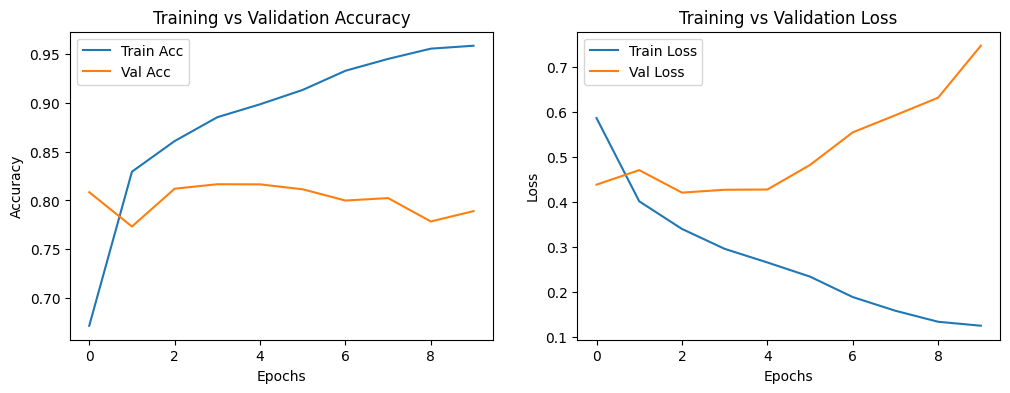

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


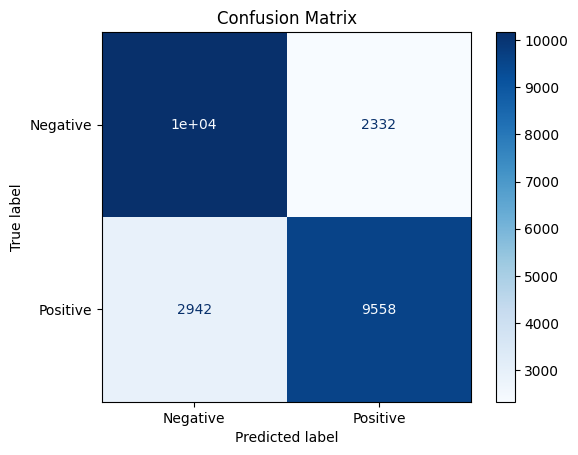

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ----- Plot training history -----
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['acc'], label='Train Acc')
plt.plot(history.history['val_acc'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()

# ----- Confusion Matrix -----
# Get predictions (probabilities -> classes)
y_pred = (model.predict(X_test) > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative','Positive'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
